<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220607/ML_project_0607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML_Project

1) 데이터를 구체적으로 살펴 보기에 앞서 간단한 전처리 이 후 modeling을 통해 성능이 어떻게 나오는지 살펴보자. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/TIL(Today I Learned)/20220607/ML-project/data/'

#### train data set의 row가 400만개 이상이므로 Kaggle에서 제공하는 코드를 통해 data의 memory usage를 줄인 다음 modeling 작업을 진행한다. (그렇지 않는다면 중간에 kernel이 끊기는 문제가 발생할 수 있다.)

In [ ]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
data = pd.read_csv(base_path + 'train_V2.csv')
data = reduce_mem_usage(data)

Memory usage of dataframe is 983.90 MB
Memory usage after optimization is: 288.39 MB
Decreased by 70.7%


In [ ]:
pd.set_option('display.max_columns', 30)
data.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,1241,0,0,0.0,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,0,0,0,0.0,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137


In [ ]:
## rough하게 object column 모두 제외하고 모델링
## rankpoint, maxPlace, roadKills, matchDuration, teamKills

data = data.drop(columns=['Id', 'groupId', 'matchId', 'matchType', 'rankPoints', 'maxPlace', 'roadKills', 'matchDuration', 'teamKills'])

data.isna().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
numGroups          0
revives            0
rideDistance       0
swimDistance       0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='winPlacePerc')
y = data['winPlacePerc']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3557572, 19), (889393, 19), (3557572,), (889393,))

### Linear Regressor

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error

## Linear Reg, Lasso, Ridge, LGBMRegressor, RandomFor, XGBReg, CatBoost

## Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.097496964

### Lasso

In [ ]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.12611456

### Ridge

In [ ]:
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.82965e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.09749673

### SVR

In [ ]:
model = SVR()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

### KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

### DecisionTree

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

### lightGBM

In [ ]:
model = LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.064042030689996

### XGBoost

In [ ]:
model = XGBRegressor(verbosity=2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

[10:52:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:52:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:52:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:53:04] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:53:12] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:53:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:53:26] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[10:53:33] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes

0.07230419

### CatBoost

In [ ]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

Learning rate set to 0.149026
0:	learn: 0.2709777	total: 986ms	remaining: 16m 24s
1:	learn: 0.2407417	total: 1.71s	remaining: 14m 11s
2:	learn: 0.2157524	total: 2.5s	remaining: 13m 52s
3:	learn: 0.1952294	total: 3.35s	remaining: 13m 54s
4:	learn: 0.1786963	total: 4.14s	remaining: 13m 44s
5:	learn: 0.1651402	total: 4.88s	remaining: 13m 28s
6:	learn: 0.1531849	total: 5.64s	remaining: 13m 20s
7:	learn: 0.1442748	total: 6.38s	remaining: 13m 11s
8:	learn: 0.1365962	total: 7.16s	remaining: 13m 8s
9:	learn: 0.1309023	total: 7.88s	remaining: 13m
10:	learn: 0.1261145	total: 8.65s	remaining: 12m 58s
11:	learn: 0.1219894	total: 9.45s	remaining: 12m 58s
12:	learn: 0.1186175	total: 10.2s	remaining: 12m 52s
13:	learn: 0.1161783	total: 10.8s	remaining: 12m 44s
14:	learn: 0.1138015	total: 11.6s	remaining: 12m 42s
15:	learn: 0.1121928	total: 12.3s	remaining: 12m 35s
16:	learn: 0.1102336	total: 13.1s	remaining: 12m 34s
17:	learn: 0.1091108	total: 13.7s	remaining: 12m 28s
18:	learn: 0.1079360	total: 14.4

0.06197040020453851

---

### Cross validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=5, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Reg', 'Lasso', 'Ridge', 'LGBMRegressor', 'RandomFor', 'KNeighborsRegressor']
models=[LinearRegression(), Lasso(), Ridge(), LGBMRegressor(), RandomForestRegressor(), KNeighborsRegressor()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "neg_mean_absolute_error")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.82557e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.82564e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.83363e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.80533e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

### 무시해도 됨.

In [ ]:
data[data['rankPoints'] == -1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,1241,0,0,0.000000,1306,squad-fpp,28,26,-1,0,0.0,0,0.00000,0,0,244.750,1,1466,0.444336
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,1262,0,0,0.000000,1316,squad-fpp,28,28,-1,0,0.0,0,0.00000,0,0,13.500,1,1497,0.000000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.539062,0,0,0,48,1000,0,0,0.000000,1967,solo-fpp,96,92,-1,0,2004.0,0,0.00000,0,0,1089.000,6,1500,0.736816
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.250000,0,1,5,5,986,4,1,49.843750,1886,solo-fpp,97,94,-1,0,1228.0,0,76.81250,0,0,2050.000,6,1462,0.875000
14,8e244ac61b6aab,d40d0c7d3573a1,94e1c1cc443c65,0,1,122.812500,1,0,2,25,1411,1,1,37.906250,1458,squad-fpp,31,30,-1,1,1237.0,0,60.28125,0,0,1666.000,5,1531,0.899902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446939,36b218fd209b00,195337a8c2ae1d,fa1b1885f56b7d,0,0,151.500000,1,0,0,35,1255,1,1,10.773438,1797,duo-fpp,48,48,-1,0,0.0,0,0.00000,0,0,56.125,1,1539,0.383057
4446948,445aaa1ddc858e,b1efcbdb7ce674,05f6cd4077cd68,1,3,736.500000,4,1,2,7,1138,4,2,113.000000,1437,duo,49,47,-1,0,0.0,0,0.00000,0,0,1685.000,3,1500,0.791504
4446953,372304ea470cad,0db6cf38e79c9e,a530fd807f535a,0,0,30.093750,0,0,0,57,1364,0,0,0.000000,1318,squad-fpp,28,25,-1,1,0.0,0,0.00000,0,0,1025.000,5,1551,0.592773
4446954,894c01c8e4524f,c33e793af077f9,deb3a91c03d0f3,0,0,30.093750,0,0,0,58,1007,0,0,0.000000,1908,solo-fpp,99,97,-1,0,0.0,0,0.00000,0,0,2146.000,6,1502,0.530762


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


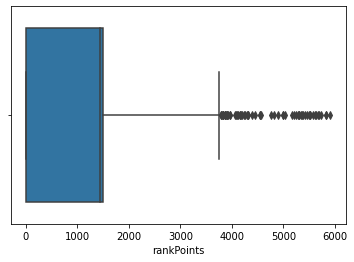

In [ ]:
sns.boxplot(data['rankPoints'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


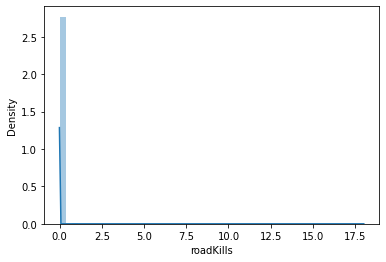

In [ ]:
sns.distplot(data['roadKills'])

In [ ]:
data[data['roadKills'] == 18]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2890740,a3438934e3e535,1081c315a80d14,fe744430ac0070,0,8,2074.0,0,1,11,1,1114,20,18,64.3125,1970,solo,38,20,-1,0,2726.0,18,0.0,0,0,3150.0,4,1568,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


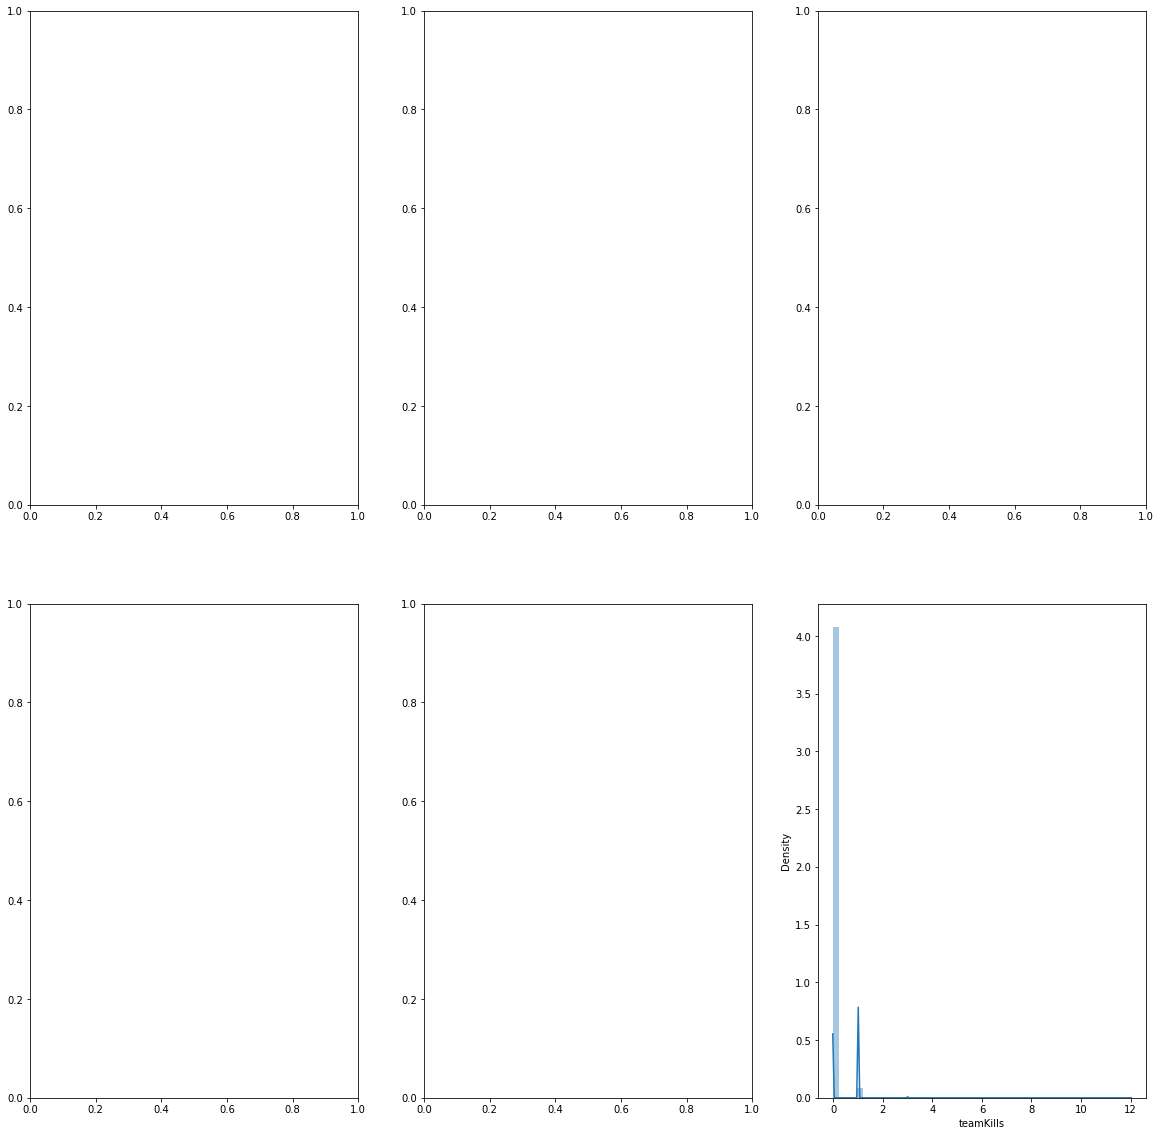

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,20))


ax[0,0] = sns.distplot(data['teamKills'])

# sns.distplot(data['matchDuration'])

# sns.distplot(data['vehicleDestroys'])

# sns.distplot(data['winPoints'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


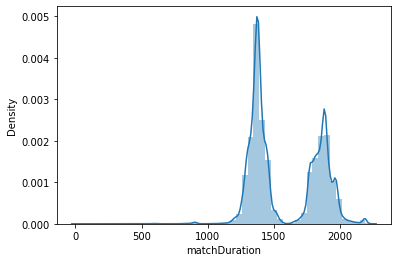

In [ ]:
sns.distplot(data['matchDuration'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


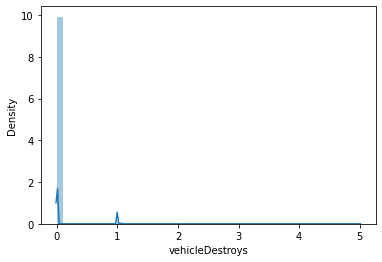

In [ ]:
sns.distplot(data['vehicleDestroys'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


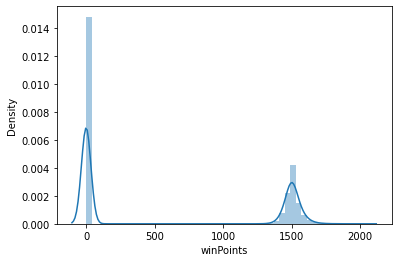

In [ ]:
sns.distplot(data['winPoints'])

In [ ]:
data['vehicleDestroys'].value_counts()

0    4413212
1      32422
2       1223
3         95
4         11
5          3
Name: vehicleDestroys, dtype: int64

In [ ]:
len(data[data['winPoints'] != 0])

1791319

In [ ]:
data['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536762
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64